# KNN with Python

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [5]:
df = pd.read_csv('Classified Data', index_col = 0)
df.head()
#anonymous classified data

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


#### In knn we'll start by scaling our data.

Because the knn classifier predicts classes based on oberservations that are nearest to it, the scale of the values has a huge impact on the results. Any varialbes that are on a large scale have a much larger effect on the distance between observations.

When using knn you want to standardize the values in all columns to the same scale

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
#create an instance for the standard scaler
scaler = StandardScaler()

In [9]:
#fit the scaler to the data, excluding the target class
scaler.fit(df.drop('TARGET CLASS', axis = 1))

StandardScaler()

In [10]:
#transform all the data, excluding the target class, by centerign and scaling.
scaled_features = scaler.transform(df.drop("TARGET CLASS", axis = 1))

In [14]:
scaled_features
#array of scaled values in the same shape as the df.
#we'll use this array in the model

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [15]:
df_feat = pd.DataFrame(data = scaled_features, columns = df.columns[:-1])

In [16]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


#### We move onto the train_test_split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#### Now we use knn

We'll start with a k value of 1 and then try different k values to get the best model -> called the elbow method

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)

In [21]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
pred = knn.predict(X_test)

#### Evaluate results based on the model

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
print(confusion_matrix(y_test, pred))

[[148  11]
 [ 15 126]]


In [25]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       159
           1       0.92      0.89      0.91       141

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



#### elbow method to determine best k value

In [26]:
error_rate = []

In [28]:
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) #take the mean of the prediction values if they don't match the y_test values

In [39]:
error_rate[:10]

[0.08666666666666667,
 0.09666666666666666,
 0.08,
 0.07333333333333333,
 0.06333333333333334,
 0.056666666666666664,
 0.05333333333333334,
 0.05333333333333334,
 0.05333333333333334,
 0.05333333333333334]

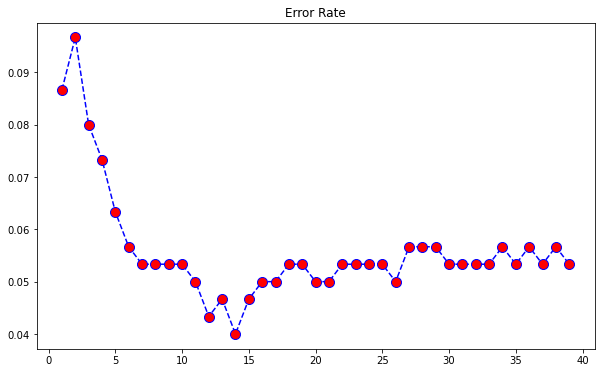

In [32]:
#then we'll plot out the error rates
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = '--', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate')
plt.xlabel = 'K Value'
plt.ylabel = 'Error Rate'

In [37]:
error_rate.index(min(error_rate))
#looks like the lowest error rate is the 13th index (aka k of 14)

13

In [38]:
#now we'll rerun some of the code with k = 14
knn = KNeighborsClassifier(n_neighbors = 14)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.96      0.96       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

[[153   6]
 [  6 135]]
